In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./train.csv")

In [4]:
data = df.values

In [5]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Y = data[:,:1]

In [7]:
Y = Y.reshape((-1,))
Y

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [8]:
X = data[:,1:]

In [9]:
X.shape

(42000, 784)

In [10]:
split = int(0.8*(X.shape[0]))

In [11]:
X_train = X[:split,:]
Y_train = Y[:split]

X_test = X[split:,:]
Y_test = Y[split:]

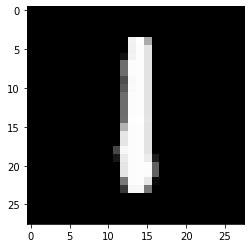

1


In [12]:
#Visualising Image

def getImage(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap = 'gray')
    plt.show()

getImage(X_train[118])
print(Y_train[118])

In [13]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))


def Knn(x,y,queryPoint,k = 5):
    m = x.shape[0]
    vals = []
    
    for i in range(m):
        d = dist(queryPoint,x[i])
        vals.append((d,y[i]))
    
    vals = sorted(vals)
    vals = vals[:k]
    
    vals = np.array(vals)
    
    new_vals = np.unique(vals[:,1] , return_counts = True)
    #print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

In [16]:
num = Knn(X_train,Y_train,X_test[109])
print(int(num))

3


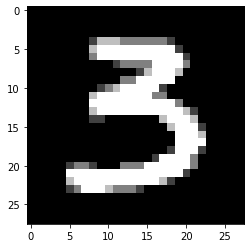

In [17]:
getImage(X_test[109])
